# Comparison to Spec2Vec
Spec2Vec is an unsupervised approach, described in detail here: https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1008724


In [3]:
import os
#import sys
import pickle
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from ms2deepscore import SpectrumBinner
from ms2deepscore.models import SiameseModel

ROOT = os.path.dirname(os.getcwd())
path_data = os.path.join(os.path.dirname(ROOT), "Data")  # add your local data folder here

## Import Spec2Vec model

In [3]:
import gensim

path_model = os.path.join(path_data, "trained_models") # specify folder to downloaded/trained model
filename_model = "ALL_GNPS_positive_210305_Spec2Vec_stricter_losses10_1000_iter_20.model" #"spec2vec_AllPositive_ratio05_filtered_201101_iter_15.model"
filename = os.path.join(path_model, filename_model)

model = gensim.models.Word2Vec.load(filename)

## Import test data

In [4]:
import pickle
outfile = os.path.join(path_data, 'GNPS_all', 'ALL_GNPS_positive_test_split_210301.pickle')
with open(outfile, 'rb') as file:
    spectrums_test = pickle.load(file)

print(f"{len(spectrums_test)} spectrums in test data.")

3601 spectrums in test data.


In [5]:
from matchms.filtering import normalize_intensities
from matchms.filtering import select_by_intensity, select_by_mz
from matchms.filtering import reduce_to_number_of_peaks
from matchms.filtering import require_minimum_number_of_peaks
from matchms.filtering import add_losses

def peak_processing(spectrum):
    spectrum = normalize_intensities(spectrum)
    spectrum = select_by_intensity(spectrum, intensity_from=0.001)
    spectrum = select_by_mz(spectrum, mz_from=10, mz_to=1000)
    spectrum = reduce_to_number_of_peaks(spectrum, n_max=1000)
    spectrum = add_losses(spectrum, loss_mz_from=5.0, loss_mz_to=1000.0)
    return spectrum

In [6]:
spectrums_test = [peak_processing(s) for s in spectrums_test]

## Compute Spec2Vec similarities

In [7]:
from matchms import calculate_scores
from spec2vec import Spec2Vec

spec2vec_similarity = Spec2Vec(model=model, intensity_weighting_power=0.5,
                               allowed_missing_percentage=50.0, progress_bar=True)

scores = calculate_scores(spectrums_test, spectrums_test, spec2vec_similarity, is_symmetric=True)

Calculating vectors of reference spectrums:   1%|▍                                  | 47/3601 [00:00<00:15, 230.69it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.52%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.32%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.43%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.04%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.66%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.18%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.03%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.96%.
Found 6 word(s) missing in the model.

Calculating vectors of reference spectrums:   2%|▋                                  | 71/3601 [00:00<00:22, 153.82it/s]

Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.05%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.88%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.85%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.45%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.12%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.37%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.11%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.97%.
Found 1 word(s) missing in the mo

Calculating vectors of reference spectrums:   3%|▉                                 | 100/3601 [00:00<00:18, 190.26it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.39%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.68%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.20%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.80%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.42%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.41%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.23%.
Found 8 word(s) missing in the model.

Calculating vectors of reference spectrums:   4%|█▎                                | 143/3601 [00:00<00:21, 159.87it/s]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.83%.
Found 34 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.03%.
Found 33 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.79%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.46%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.34%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.24%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.90%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.33%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.98%.
Found 9 word(s) missing in the mod

Calculating vectors of reference spectrums:   4%|█▌                                | 161/3601 [00:01<00:26, 130.29it/s]

Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.48%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.43%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.36%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.23%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.51%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.62%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.97%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.47%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 2 word(s) missing in the mode

Calculating vectors of reference spectrums:   6%|██                                | 222/3601 [00:01<00:17, 191.58it/s]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.40%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.77%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.56%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.32%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.95%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.24%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.55%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.70%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.06%.
Found 1 word(s) missing in the model

Calculating vectors of reference spectrums:   7%|██▎                               | 244/3601 [00:01<00:19, 171.50it/s]

Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.82%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.33%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.78%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.30%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.23%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.28%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.42%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.88%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 9 word(s) missing in the m

Calculating vectors of reference spectrums:   7%|██▍                               | 264/3601 [00:01<00:27, 121.31it/s]

Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.33%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.07%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.15%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.88%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.21%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.38%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.55%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.28%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.42%.
Found 1 word(s) missing in the model.

Calculating vectors of reference spectrums:   8%|██▋                               | 280/3601 [00:01<00:28, 115.44it/s]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.85%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.77%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.33%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.09%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.24%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.29%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.39%.


Calculating vectors of reference spectrums:   8%|██▊                                | 294/3601 [00:02<00:41, 79.71it/s]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.09%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.07%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.14%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.52%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.30%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.


Calculating vectors of reference spectrums:   8%|██▉                                | 305/3601 [00:02<00:45, 72.47it/s]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.43%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.24%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.05%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.04%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.35%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.04%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.07%.


Calculating vectors of reference spectrums:   9%|███                                | 315/3601 [00:02<00:51, 64.15it/s]

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.26%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.24%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.37%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.36%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.31%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.47%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.21%.


Calculating vectors of reference spectrums:   9%|███▏                               | 323/3601 [00:02<00:55, 59.12it/s]

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.41%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.14%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.15%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.35%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.25%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.22%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.


Calculating vectors of reference spectrums:   9%|███▎                               | 340/3601 [00:03<00:56, 57.87it/s]

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.38%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.14%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.42%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.09%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.10%.


Calculating vectors of reference spectrums:  10%|███▌                               | 371/3601 [00:03<00:36, 88.50it/s]

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.38%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.26%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.47%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.12%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.


Calculating vectors of reference spectrums:  11%|███▊                              | 402/3601 [00:03<00:31, 103.14it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.29%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.62%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.48%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.60%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.32%.
Found 75 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.64%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.20%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.11%.
Found 1 word(s) missing in the mo

Calculating vectors of reference spectrums:  11%|████                               | 414/3601 [00:03<00:32, 98.63it/s]

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.96%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.45%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.35%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.42%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.47%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.28%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.21%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.28%.
Found 2 word(s) missing in the mo

Calculating vectors of reference spectrums:  12%|████▏                             | 447/3601 [00:04<00:24, 127.49it/s]

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.21%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.21%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.30%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.26%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.38%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.97%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.14%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.11%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.53%.
Found 52 word(s) missing in the mode

Calculating vectors of reference spectrums:  13%|████▌                             | 481/3601 [00:04<00:22, 140.59it/s]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.16%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.18%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.23%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.44%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.83%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.09%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.18%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.28%.
Found 20 word(s) missing in the model

Calculating vectors of reference spectrums:  14%|████▊                             | 511/3601 [00:04<00:22, 134.66it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.39%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.79%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.15%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.32%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.05%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.04%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.20%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.33%.


Calculating vectors of reference spectrums:  15%|█████▏                            | 550/3601 [00:04<00:15, 192.11it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.66%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.39%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.33%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.98%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.56%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.20%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.11%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.22%.
Found 145 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.45%.
Found 10 word(s) missing in the mod

Calculating vectors of reference spectrums:  16%|█████▌                             | 570/3601 [00:05<00:32, 93.36it/s]

Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.39%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.29%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.18%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.28%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.61%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.65%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.24%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.18%.
Found 4 word(s) missing in the model

Calculating vectors of reference spectrums:  16%|█████▋                             | 585/3601 [00:05<00:40, 73.97it/s]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.23%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.09%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.16%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.33%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.21%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.16%.


Calculating vectors of reference spectrums:  18%|██████▏                           | 659/3601 [00:05<00:19, 150.51it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.44%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.10%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.36%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.53%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.77%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.39%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.18%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.56%.
Found 5 word(s) missing in the model.

Calculating vectors of reference spectrums:  21%|███████▏                          | 766/3601 [00:05<00:10, 273.97it/s]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.20%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.15%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.06%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.78%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.39%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.19%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.90%.


Calculating vectors of reference spectrums:  22%|███████▌                          | 804/3601 [00:06<00:12, 230.85it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.48%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.71%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.32%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.39%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.33%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.59%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.38%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.62%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.58%.
Found 4 word(s) missing in the mode

Calculating vectors of reference spectrums:  24%|████████▎                         | 881/3601 [00:06<00:09, 274.12it/s]

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.62%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.82%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.61%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.37%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.66%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.89%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.51%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.53%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.55%.
Found 5 word(s) missing in the model.

Calculating vectors of reference spectrums:  25%|████████▋                         | 915/3601 [00:06<00:09, 272.08it/s]

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.75%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.69%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.69%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.69%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.69%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.10%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.71%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.23%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.44%.
Found 4 word(s) missing in the model.

Calculating vectors of reference spectrums:  28%|█████████▏                       | 1007/3601 [00:06<00:07, 352.53it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.32%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.34%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.37%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.54%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.16%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.61%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.20%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.97%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.08%.
Found 1 word(s) missing in the model.

Calculating vectors of reference spectrums:  29%|█████████▋                       | 1053/3601 [00:06<00:06, 379.16it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.88%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.55%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.65%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.35%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.06%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.77%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.93%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.39%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.
Found 3 word(s) missing in the model.

Calculating vectors of reference spectrums:  31%|██████████▎                      | 1130/3601 [00:07<00:07, 314.27it/s]

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.27%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.48%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.14%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.28%.
Found 33 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.54%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.49%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.14%.


Calculating vectors of reference spectrums:  41%|█████████████▌                   | 1477/3601 [00:07<00:02, 790.68it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.79%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.08%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.63%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.55%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.34%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.87%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.50%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.24%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.88%.
Found 1 word(s) missing in the model.

Calculating vectors of reference spectrums:  43%|██████████████▎                  | 1562/3601 [00:07<00:02, 752.69it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.27%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.46%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.76%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.35%.


Calculating vectors of reference spectrums:  48%|███████████████▋                 | 1714/3601 [00:07<00:03, 587.44it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.24%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.06%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.33%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.32%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.12%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.40%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.48%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.27%.
Found 1 word(s) missing in the model.

Calculating vectors of reference spectrums:  49%|████████████████▎                | 1778/3601 [00:08<00:03, 552.83it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.36%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.21%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.63%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.84%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.73%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.07%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.29%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.


Calculating vectors of reference spectrums:  53%|█████████████████▋               | 1924/3601 [00:08<00:02, 587.78it/s]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.77%.


Calculating vectors of reference spectrums:  67%|█████████████████████▉           | 2397/3601 [00:08<00:01, 761.60it/s]

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.77%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.21%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.14%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.80%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.58%.


Calculating vectors of reference spectrums:  69%|██████████████████████▉          | 2502/3601 [00:08<00:01, 839.95it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.25%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.51%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.27%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.99%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.58%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.11%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.50%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.96%.
Found 7 word(s) missing in the model.

Calculating vectors of reference spectrums:  72%|███████████████████████▋         | 2588/3601 [00:09<00:02, 387.39it/s]

Weighted missing percentage not covered by the given model is 0.36%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.56%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.14%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.71%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.21%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.07%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.07%.
Found 1 word(s) missing in the model. Weighted missing percentage not cover

Calculating vectors of reference spectrums:  74%|████████████████████████▎        | 2653/3601 [00:10<00:03, 249.62it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.04%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.10%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.09%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.05%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.21%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.29%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.12%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.27%.
Found 4 word(s) missing in the model.

Calculating vectors of reference spectrums:  75%|████████████████████████▊        | 2702/3601 [00:10<00:03, 224.91it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.24%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.25%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.33%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.41%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.05%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.38%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.15%.
Found 1 word(s) missing in the model.

Calculating vectors of reference spectrums:  76%|█████████████████████████▏       | 2742/3601 [00:10<00:04, 213.68it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.05%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.22%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.09%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.61%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.07%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.20%.


Calculating vectors of reference spectrums:  77%|█████████████████████████▍       | 2775/3601 [00:10<00:04, 205.87it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.16%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.20%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.04%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.10%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 1 word(s) missing in the model.

Calculating vectors of reference spectrums:  79%|█████████████████████████▉       | 2827/3601 [00:11<00:04, 169.04it/s]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.39%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.89%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.18%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.34%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.05%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.22%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.


Calculating vectors of reference spectrums:  79%|██████████████████████████       | 2848/3601 [00:11<00:04, 158.34it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.04%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.20%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.22%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.18%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.33%.
Found 4 word(s) missing in the model.

Calculating vectors of reference spectrums:  80%|██████████████████████████▎      | 2867/3601 [00:11<00:05, 126.96it/s]

 Weighted missing percentage not covered by the given model is 0.18%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.01%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.21%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.22%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.20%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.22%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.49%.
Found 6 word(s) missing in the model. Weighted missing percentage not cov

Calculating vectors of reference spectrums:  80%|██████████████████████████▍      | 2882/3601 [00:11<00:06, 117.15it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.57%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.79%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.10%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.09%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.07%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.11%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.02%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 1 word(s) missing in the model.

Calculating vectors of reference spectrums:  81%|███████████████████████████▍      | 2907/3601 [00:12<00:07, 87.27it/s]

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.49%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.23%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.45%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.36%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.10%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.54%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.40%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.60%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.92%.
Found 15 word(s) missing in the model

Calculating vectors of reference spectrums:  81%|███████████████████████████▌      | 2919/3601 [00:12<00:07, 89.03it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.18%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.16%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.02%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.05%.


Calculating vectors of reference spectrums:  82%|███████████████████████████▊      | 2940/3601 [00:12<00:07, 89.94it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.04%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.20%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.23%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.49%.


Calculating vectors of reference spectrums:  83%|███████████████████████████▏     | 2973/3601 [00:12<00:05, 118.31it/s]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.57%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.07%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.16%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.37%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.07%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.29%.


Calculating vectors of reference spectrums:  83%|███████████████████████████▌     | 3002/3601 [00:13<00:04, 126.80it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.29%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.43%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.14%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.09%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.92%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.36%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.74%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.24%.
Found 1 word(s) missing in the model.

Calculating vectors of reference spectrums:  84%|███████████████████████████▋     | 3025/3601 [00:13<00:03, 145.76it/s]

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.43%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.14%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.24%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.73%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.32%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.25%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.


Calculating vectors of reference spectrums:  84%|████████████████████████████▋     | 3040/3601 [00:13<00:05, 99.03it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.71%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.62%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.43%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.62%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.68%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.44%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.94%.
Found 2 word(s) missing in the model.

Calculating vectors of reference spectrums:  85%|████████████████████████████▊     | 3053/3601 [00:13<00:06, 82.13it/s]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.05%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.31%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.15%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.07%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.10%.


Calculating vectors of reference spectrums:  85%|████████████████████████████▉     | 3064/3601 [00:13<00:07, 74.79it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.02%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.09%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.04%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.


Calculating vectors of reference spectrums:  86%|█████████████████████████████     | 3082/3601 [00:14<00:06, 75.16it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.71%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.58%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.12%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.96%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.70%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.65%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.54%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.20%.
Found 5 word(s) missing in the model.

Calculating vectors of reference spectrums:  86%|█████████████████████████████▎    | 3107/3601 [00:14<00:05, 87.14it/s]

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.27%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.32%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.65%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.50%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.29%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.10%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.02%.


Calculating vectors of reference spectrums:  87%|█████████████████████████████▍    | 3117/3601 [00:14<00:06, 77.05it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.05%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.01%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.05%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.21%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.22%.
Found 1 word(s) missing in the model.

Calculating vectors of reference spectrums:  87%|█████████████████████████████▋    | 3141/3601 [00:14<00:05, 86.12it/s]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.10%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.14%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.07%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.09%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.07%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.04%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.05%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.
Found 2 word(s) missing in the model.

Calculating vectors of reference spectrums:  88%|█████████████████████████████    | 3172/3601 [00:15<00:03, 112.09it/s]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.36%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.78%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.39%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.16%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.24%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.57%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.23%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.91%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 16 word(s) missing in the m

Calculating vectors of reference spectrums:  89%|█████████████████████████████▏   | 3189/3601 [00:15<00:03, 125.92it/s]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.36%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.28%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.07%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.14%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.32%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.28%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.18%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.34%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.15%.
Found 9 word(s) missing in the model

Calculating vectors of reference spectrums:  89%|█████████████████████████████▎   | 3203/3601 [00:15<00:03, 110.66it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.04%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.01%.


Calculating vectors of reference spectrums:  90%|██████████████████████████████▍   | 3226/3601 [00:15<00:03, 94.95it/s]

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.79%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.49%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.21%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.56%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.37%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.12%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.14%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 1 word(s) missing in the model.

Calculating vectors of reference spectrums:  90%|██████████████████████████████▋   | 3249/3601 [00:15<00:04, 86.61it/s]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.05%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.45%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.48%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.83%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.26%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.18%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.79%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.43%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.31%.
Found 1 word(s) missing in the mode

Calculating vectors of reference spectrums:  91%|██████████████████████████████▏  | 3289/3601 [00:16<00:02, 117.76it/s]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.02%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.54%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.88%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.25%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.18%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.28%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.27%.
Found 3 word(s) missing in the model.

Calculating vectors of reference spectrums:  92%|██████████████████████████████▍  | 3322/3601 [00:16<00:02, 131.47it/s]

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.85%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.51%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.83%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.39%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.09%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.43%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.84%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.55%.
Found 1 word(s) missing in the model.

Calculating vectors of reference spectrums:  93%|██████████████████████████████▌  | 3336/3601 [00:16<00:02, 125.58it/s]

Found 45 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.11%.
Found 40 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.82%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.74%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.29%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.07%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.37%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.30%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.12%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.58%.
Found 1 word(s) missing in the mode

Calculating vectors of reference spectrums:  93%|██████████████████████████████▊  | 3366/3601 [00:16<00:01, 135.99it/s]

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.73%.
Found 45 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.40%.
Found 48 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.53%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.60%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.89%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.22%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.00%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.40%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.31%.
Found 1 word(s) missing in the mode

Calculating vectors of reference spectrums:  95%|███████████████████████████████▎ | 3422/3601 [00:16<00:00, 197.76it/s]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.29%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.35%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.46%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.38%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.28%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.07%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.29%.
Found 1 word(s) missing in the model.

Calculating vectors of reference spectrums: 100%|█████████████████████████████████| 3601/3601 [00:17<00:00, 211.21it/s]


Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.89%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.21%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.87%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.86%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.10%.


In [8]:
scores.scores.shape

(3601, 3601)

## Get reference scores

In [9]:
filename = os.path.join(path_data, 'ALL_GNPS_210125_positive_tanimoto_scores.pickle')
tanimoto_df = pd.read_pickle(filename)
tanimoto_df.head()

,TXZUPPVCNIMVHW,DGYASNDHNSXGSL,JWYUFVNJZUSCSM,ZQXBVPNSSGEUCM,WIOKWEJDRXNVSH,NJMQSVWMCODQIP,VBFKEZGCUWHGSK,KJAYXCCGPDNITQ,NTAHMPNXQOYXSX,YALMHTJLWDGANA,...,DCPZWPYLSMMJKM,BFZHCUBIASXHPK,IYUIDAWSRJAFII,YMGXBGVMAOTRFZ,ZOVBJSDLILDXCH,ZBAVIUQLFUYWMT,LBZHBTVSBILXAE,FQXXSQDCDRQNQE,PKKTXAMCHLIVDS,HDDNZVWBRRAOGK
TXZUPPVCNIMVHW,1.000000,0.351169,0.097595,0.454490,0.232465,0.350913,0.220788,0.369819,0.553414,0.488411,...,0.245836,0.197547,0.319240,0.170619,0.419412,0.111339,0.502242,0.609171,0.456767,0.364198
DGYASNDHNSXGSL,0.351169,1.000000,0.095344,0.311426,0.266393,0.306679,0.187037,0.241550,0.352905,0.346228,...,0.239921,0.196926,0.248181,0.224319,0.328424,0.134894,0.371523,0.395833,0.325097,0.267617
JWYUFVNJZUSCSM,0.097595,0.095344,1.000000,0.087488,0.096552,0.089779,0.075710,0.078571,0.101093,0.111277,...,0.087171,0.076667,0.090069,0.086042,0.097539,0.082902,0.100224,0.097547,0.091977,0.091603
ZQXBVPNSSGEUCM,0.454490,0.311426,0.087488,1.000000,0.158416,0.403968,0.223629,0.428328,0.476427,0.356584,...,0.190833,0.303226,0.309870,0.151724,0.382889,0.200405,0.419784,0.455195,0.301105,0.505532
WIOKWEJDRXNVSH,0.232465,0.266393,0.096552,0.158416,1.000000,0.170429,0.115108,0.148259,0.213307,0.193948,...,0.235054,0.100985,0.156159,0.146067,0.189189,0.065600,0.208011,0.223117,0.272388,0.147978


In [10]:
inchikey_idx_test = np.zeros(len(spectrums_test))
for i, spec in enumerate(spectrums_test):
    inchikey_idx_test[i] = np.where(tanimoto_df.index.values == spec.get("inchikey")[:14])[0]

inchikey_idx_test = inchikey_idx_test.astype("int")

scores_ref = tanimoto_df.values[np.ix_(inchikey_idx_test[:], inchikey_idx_test[:])].copy()

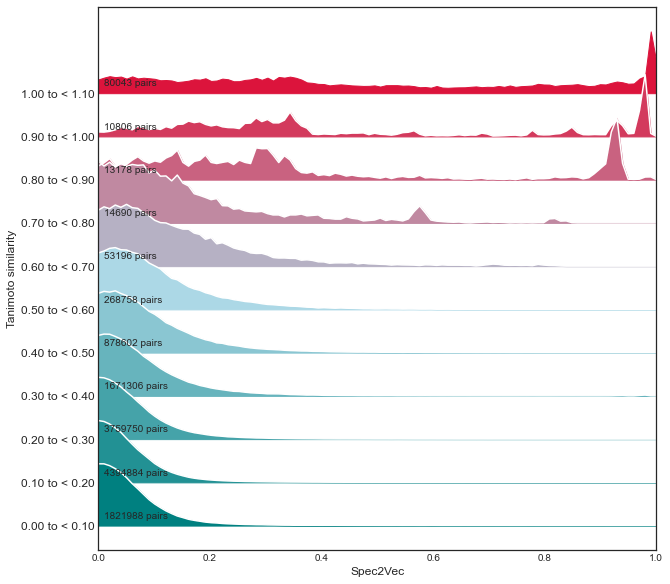

In [17]:
from ms2deepscore.plotting import create_histograms_plot

create_histograms_plot(scores_ref, scores.scores, n_bins=10, hist_resolution=100,
                          ref_score_name="Tanimoto similarity", compare_score_name="Spec2Vec")
plt.savefig("histogram_spec2vec_210311_ALL_GNPS_testset.pdf")

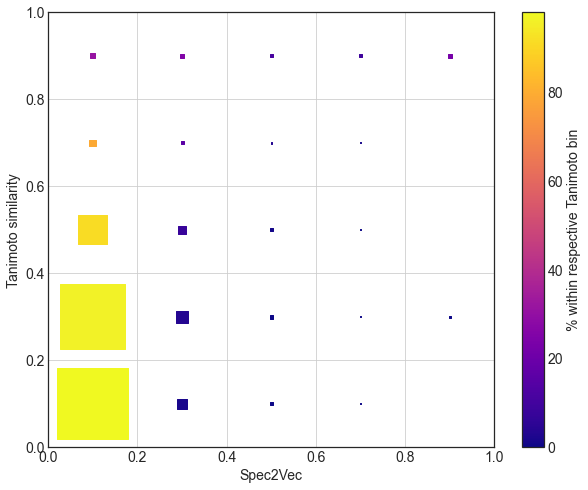

In [18]:
from ms2deepscore.plotting import create_confusion_matrix_plot

fig = create_confusion_matrix_plot(scores_ref, scores.scores, n_bins=5,
                                   ref_score_name="Tanimoto similarity", compare_score_name="Spec2Vec",
                                   max_square_size=5000)
plt.savefig("confusion_spec2vec_210311_ALL_GNPS_testset.pdf")

In [35]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


def create_histograms_plot(reference_scores, comparison_scores, n_bins=10, hist_resolution=100,
                          ref_score_name="Tanimoto similarity", compare_score_name="MS2DeepScore"):
    """
    Plot histograms to compare reference and comparison scores.

    Parameters
    ----------
    reference_scores
        Reference score array.
    comparison_scores
        Comparison score array.
    n_bins
        Number of bins. The default is 5.
    hist_resolution
        Histogram resolution. The default is 100.
    ref_score_name
        Label string. The default is "Tanimoto similarity".
    compare_score_name
        Label string. The default is "MS2DeepScore".

    """
    # pylint: disable=too-many-arguments
    histograms, used_bins, bin_content = calculate_histograms(reference_scores, comparison_scores,
                                                 n_bins, hist_resolution)

    plot_histograms(histograms, used_bins, bin_content, xlabel=compare_score_name, ylabel=ref_score_name)


def plot_histograms(histograms, y_score_bins, bin_content=None,
                    xlabel="MS2DeepScore", ylabel="Tanimoto similarity"):
    """Create histogram based score comparison.
    """

    # Setup plotting stuff
    colors = ["crimson", "lightblue", "teal"]
    cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)
    plt.style.use('seaborn-white')
    shift = 0.7
    alpha = 1.0 #0.5

    # Create plot
    plt.figure(figsize=(10,10))

    for i in range(0, len(histograms)):
        data = histograms[len(histograms)-i-1][0]
        data = data/max(data)
        plt.fill_between(histograms[0][1][:100], -shift*i, [(-shift*i + x) for x in data], color=cmap1(i/10), alpha=alpha)
        if i > 0:
            plt.plot(histograms[0][1][:100], [(-shift*i + x) for x in data], color="white")
        if bin_content:
            plt.text(0.01, -shift*i+shift/6, f"{bin_content[::-1][i]} pairs")#, color="white")

    plt.yticks(-shift*np.arange(len(histograms)),
               [f"{a:.2f} to < {b:.2f}" for (a, b) in y_score_bins[::-1]], fontsize=12)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlim([0, 1])


def calculate_histograms(reference_scores, comparison_scores, n_bins=10, hist_resolution=100):
    """Calcualte a series of histograms, one for every bin."""
    d_bin = 1/n_bins
    hist_bins = np.linspace(0, 1, hist_resolution)
    hist_bins = np.concatenate((hist_bins, np.array([2.0])))

    histograms = []
    used_bins = []
    bin_content = []
    for i in range(n_bins+1):
        used_bins.append((i*d_bin, (i + 1) * d_bin))
        idx = np.where((reference_scores >= i*d_bin) & (reference_scores < (i + 1) * d_bin))
        bin_content.append(idx[0].shape[0])
        a, b = np.histogram(comparison_scores[idx], bins=hist_bins)
        histograms.append((a, b))

    return histograms, used_bins, bin_content


def create_confusion_matrix_plot(reference_scores, comparison_scores, n_bins=5,
                                 ref_score_name="Tanimoto similarity", compare_score_name="MS2DeepScore",
                                 max_square_size=5000,
                                 lower_bound=0, upper_bound=1,
                                 color_by_reference_fraction=True,
                                 add_numbers=True):
    """
    Plot histograms to compare reference and comparison scores.

    Parameters
    ----------
    reference_scores
        Reference score array.
    comparison_scores
        Comparison score array.
    n_bins
        Number of bins. The default is 5.
    ref_score_name
        Label string. The default is "Tanimoto similarity".
    compare_score_name
        Label string. The default is "MS2DeepScore".
    max_square_size
        Maximum square size.
    lower_bound
        Lower bound for scores to include in plot (scores < lower_bound will be added to lowest bin).
    upper_bound
        Upper bound for scores to include in plot
    color_by_reference_fraction
        When True, color squares by fractions within the reference score bin. Default is True.
    """
    # pylint: disable=too-many-arguments
    confusion_like_matrix, confusion_like_matrix_scatter = derive_scatter_data(reference_scores,
                                                                               comparison_scores,
                                                                               lower_bound, upper_bound,
                                                                               n_bins, n_bins)
    fig = plot_confusion_like_matrix(confusion_like_matrix_scatter, confusion_like_matrix,
                                     xlabel=compare_score_name, ylabel=ref_score_name,
                                     max_size=max_square_size,
                                     lower_bound=lower_bound, upper_bound=upper_bound,
                                     color_by_reference_fraction=color_by_reference_fraction,
                                     add_numbers=add_numbers)
    return fig


def plot_confusion_like_matrix(confusion_like_matrix_scatter, confusion_like_matrix,
                              xlabel, ylabel, max_size=5000,
                              lower_bound=0, upper_bound=1,
                               color_by_reference_fraction=True,
                               add_numbers=True):
    """Do the actual plotting"""
    # pylint: disable=too-many-arguments
    summed_tanimoto = []
    for i in range(confusion_like_matrix.shape[0]):
        for _ in range(confusion_like_matrix.shape[1]):
            summed_tanimoto.append(confusion_like_matrix[i,:].sum())

    sizes = np.array([x[2] for x in confusion_like_matrix_scatter])
    colors = 100*sizes/np.array(summed_tanimoto)  # color percentage
    sizes = sizes/np.max(sizes)

    plt.style.use('seaborn-white')
    if color_by_reference_fraction:
        fig = plt.figure(figsize=(10, 8))
        plt.scatter([x[1] for x in confusion_like_matrix_scatter],
                    [x[0] for x in confusion_like_matrix_scatter], marker='s', c=colors, cmap="plasma",
                    s=sizes*max_size)
    else:
        fig = plt.figure(figsize=(8, 8))
        plt.scatter([x[1] for x in confusion_like_matrix_scatter],
                    [x[0] for x in confusion_like_matrix_scatter], marker='s', c="dodgerblue",
                    s=sizes*max_size)
    if add_numbers:
        cell_size = (upper_bound - lower_bound) / int(len(confusion_like_matrix_scatter)**0.5)
        for x in confusion_like_matrix_scatter:
            plt.text(x[1], x[0]-0.2*cell_size, str(x[2]), ha="center")
    if color_by_reference_fraction:
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
        cbar.set_label('% within respective Tanimoto bin', rotation=90, fontsize=14)

    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim(lower_bound, upper_bound)
    plt.ylim(lower_bound, upper_bound)
    plt.clim(0)
    plt.grid(True)
    return fig


def derive_scatter_data(reference_scores, comparison_scores,
                        lower_bound, upper_bound,
                        n_bins_x, n_bins_y):
    """Helper function to collect actual scatter plot data"""
    # pylint: disable=too-many-arguments
    bins_x = np.linspace(lower_bound,upper_bound+0.0001, n_bins_x+1)
    bins_y = np.linspace(lower_bound,upper_bound+0.0001, n_bins_y+1)
    confusion_like_matrix = np.zeros((n_bins_x, n_bins_y))
    confusion_like_matrix_scatter = []
    for i in range(n_bins_x):
        for j in range(n_bins_y):
            if i > 0:
                low_x = bins_x[i]
            else:
                low_x = np.min(reference_scores)
            if j > 0:
                low_y = bins_y[j]
            else:
                low_y = np.min(comparison_scores)
            idx = np.where((reference_scores>=low_x) & (reference_scores<bins_x[i+1]) &
                          (comparison_scores>=low_y) & (comparison_scores<bins_y[j+1]))
            confusion_like_matrix[i, j] = idx[0].shape[0]
            confusion_like_matrix_scatter.append(((bins_x[i] + bins_x[i+1])/2,
                                                 (bins_y[j] + bins_y[j+1])/2,
                                                 idx[0].shape[0]))
    return confusion_like_matrix, confusion_like_matrix_scatter


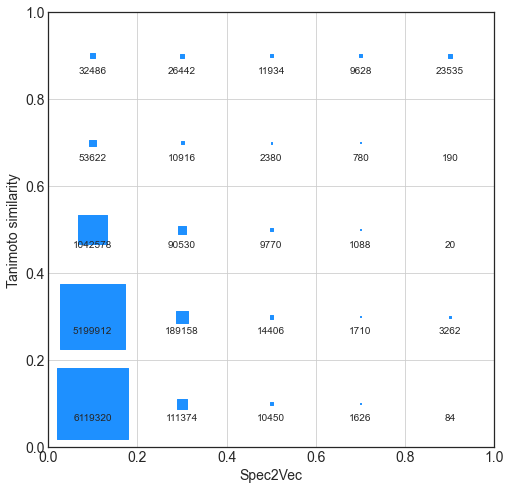

In [36]:
fig = create_confusion_matrix_plot(scores_ref, scores.scores, n_bins=5,
                                   ref_score_name="Tanimoto similarity", compare_score_name="Spec2Vec",
                                   max_square_size=5000, color_by_reference_fraction=False)
plt.savefig("confusion_spec2vec_210323_ALL_GNPS_testset.pdf")

In [20]:
def precision_recall_plot(scores_test, scores_ref,
                          high_sim_threshold=0.6,
                          n_bins = 20):
    """Basic precision recall plot"""
    precisions = []
    recalls = []

    above_thres_total = np.sum(scores_ref >= high_sim_threshold)
    max_score = scores_test.max()
    min_score = scores_test.min()
    score_thresholds = np.linspace(min_score, max_score, n_bins+1)
    for low in score_thresholds:
        idx = np.where(scores_test>=low)
        above_thres = np.sum(scores_ref[idx] >= high_sim_threshold)
        below_thres = np.sum(scores_ref[idx] < high_sim_threshold)

        precisions.append(above_thres/(below_thres+above_thres))
        recalls.append(above_thres/above_thres_total)

    plt.figure(figsize=(6,5), dpi=120)
    plt.plot(recalls, precisions, "o--", color="crimson", label="precision/recall")
    #plt.plot(score_thresholds, precisions, "o--", color="crimson", label="precision")
    #plt.plot(score_thresholds, recalls, "o--", color="dodgerblue", label="recall")
    plt.legend()
    plt.xlabel("recall", fontsize=12)
    plt.ylabel("precision", fontsize=12)
    plt.title(f"precision/recall (high-similarity if Tanimoto > {high_sim_threshold })")
    plt.grid(True)
    
    return precisions, recalls

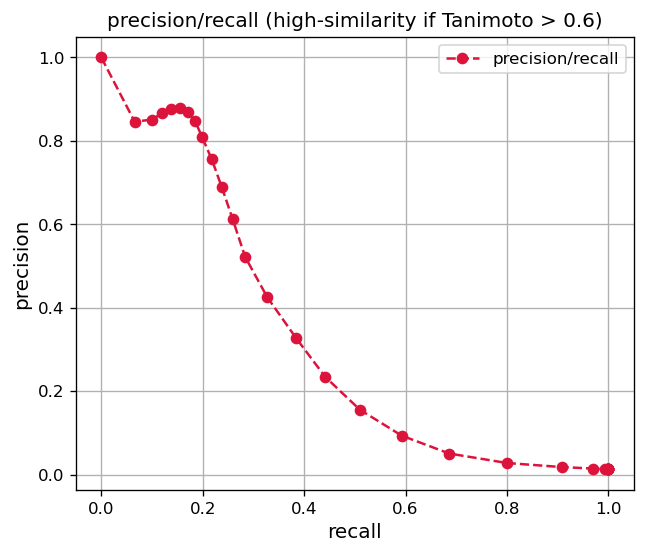

In [21]:
precisions, recalls = precision_recall_plot(scores.scores, scores_ref, high_sim_threshold=0.6, n_bins=30)
plt.savefig("precision_recall_spec2vec_230319.pdf")

In [23]:
np.save("recall_tanimoto06_spec2vec.npy", np.array(recalls))
np.save("precision_tanimoto06_spec2vec.npy", np.array(precisions))

## Compare to others

In [7]:
import numpy as np
recalls_ms2ds = np.load("recall_tanimoto06_ms2ds.npy")
precisions_ms2ds = np.load("precision_tanimoto06_ms2ds.npy")

recalls_spec2vec = np.load("recall_tanimoto06_spec2vec.npy")
precisions_spec2vec = np.load("precision_tanimoto06_spec2vec.npy")

recalls_modcos_mm2 = np.load("recall_tanimoto06_modcos_mm2.npy")
precisions_modcos_mm2 = np.load("precision_tanimoto06_modcos_mm2.npy")

recalls_modcos_mm6 = np.load("recall_tanimoto06_modcos_mm6.npy")
precisions_modcos_mm6 = np.load("precision_tanimoto06_modcos_mm6.npy")

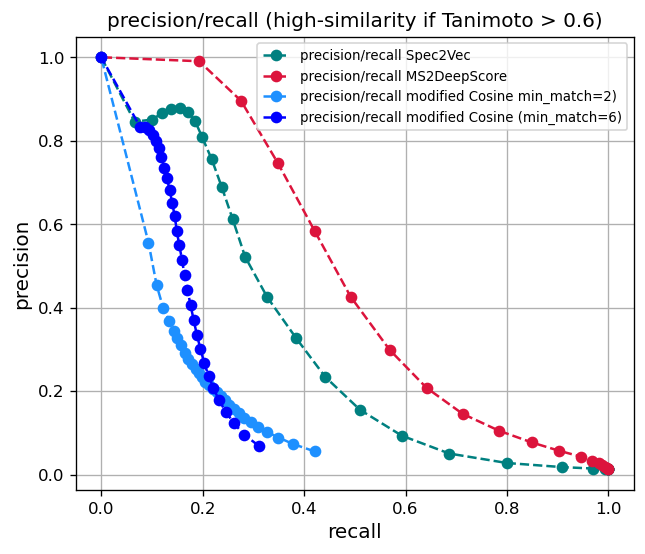

In [16]:
high_sim_threshold = 0.6

plt.figure(figsize=(6,5), dpi=120)
plt.plot(recalls_spec2vec[1:], precisions_spec2vec[1:], "o--", color="teal", label="precision/recall Spec2Vec")
plt.plot(recalls_ms2ds[1:], precisions_ms2ds[1:], "o--", color="crimson", label="precision/recall MS2DeepScore")
plt.plot(recalls_modcos_mm2[1:], precisions_modcos_mm2[1:], "o--", color="dodgerblue", label="precision/recall modified Cosine min_match=2)")
plt.plot(recalls_modcos_mm6[1:], precisions_modcos_mm6[1:], "o--", color="blue", label="precision/recall modified Cosine (min_match=6)")
plt.legend(fontsize=8)
plt.xlabel("recall", fontsize=12)
plt.ylabel("precision", fontsize=12)
plt.title(f"precision/recall (high-similarity if Tanimoto > {high_sim_threshold })")
plt.grid(True)

plt.savefig("precision_recall_comparison.pdf")

In [19]:
high_sim_threshold = 0.6

precisions = []
recalls = []

above_thres_total = np.sum(scores_ref >= high_sim_threshold)
score_thresholds = np.linspace(0.05,1,20)
for low in score_thresholds:
    idx = np.where(scores.scores>low)
    above_thres = np.sum(scores_ref[idx] >= high_sim_threshold)
    below_thres = np.sum(scores_ref[idx] < high_sim_threshold)
    
    precisions.append(above_thres/(below_thres+above_thres))
    recalls.append(above_thres/above_thres_total)
    

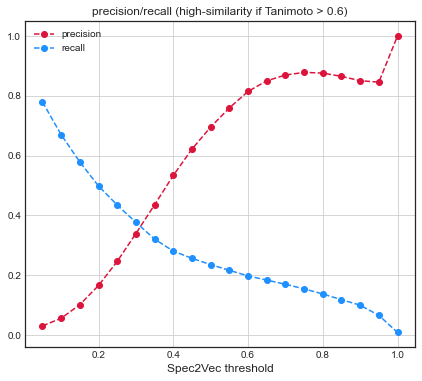

In [20]:
plt.figure(figsize=(7,6))
plt.plot(score_thresholds, precisions, "o--", color="crimson", label="precision")
plt.plot(score_thresholds, recalls, "o--", color="dodgerblue", label="recall")
plt.legend()
plt.xlabel("Spec2Vec threshold", fontsize=12)
plt.title(f"precision/recall (high-similarity if Tanimoto > {high_sim_threshold })")
plt.grid(True)